In [1]:
#import package
import numpy as np
import ezc3d


#dear abba 20 years ago today, Monday, March 4th 2024 you helped me with the ezc3d shit because I couldn't be bothered to watch a 40 second youtube video.

#set path to c3d hitting data
file_path = '/Users/leofeingold/Documents/GitHub/openbiomechanics/baseball_hitting/data/c3d/000004/000004_000103_75_236_R_003_972.c3d'

# read in c3d file and assign to variable c
c = ezc3d.c3d(file_path)


In [17]:
print(c['header']['analogs'])


{'size': 24, 'frame_rate': 1080.0, 'first_frame': 0, 'last_frame': 2411}


In [18]:
meta_data_marker = c['header']['points']
meta_data_analog = c['header']['analogs']

# define marker measurement rate and number of frames
fs_marker = meta_data_marker['frame_rate']
num_frames_marker = meta_data_marker['last_frame'] - meta_data_marker['first_frame'] 

# define analog measurement rate and number of frames
fs_analog = meta_data_analog['frame_rate']
num_frames_analog = meta_data_analog['last_frame'] - meta_data_analog['first_frame']

# create time vectors for marker and analog data
time_marker = np.arange(0, num_frames_marker/fs_marker, 1/fs_marker)
time_analog = np.arange(0, num_frames_analog/fs_analog, 1/fs_analog)

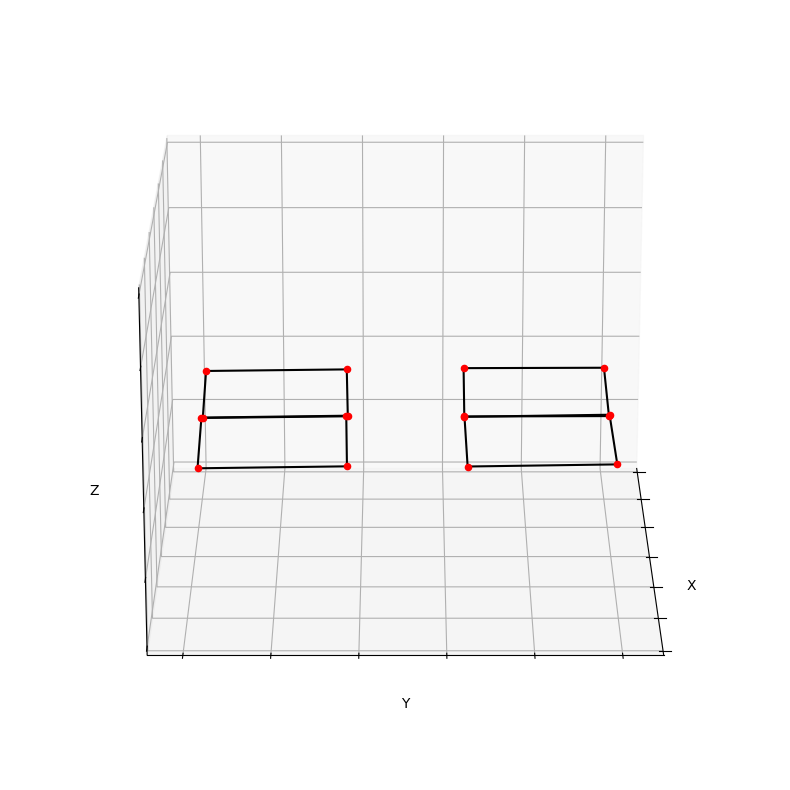

In [19]:
# import plotting package
import matplotlib.pyplot as plt

# assign force plate corner coordinates
fp_corners = c['parameters']['FORCE_PLATFORM']['CORNERS']['value'] # 3x4x3 numpy array

# set up plot
fig = plt.figure(figsize = (10,10), facecolor = 'w')
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d(-0.5, 2.5)
ax.set_zlim3d(-0.5, 2.)

# hide axis tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.view_init(elev = 20, azim = 0)
# ax.view_init(elev = 10, azim = 90) # uncomment for other viewpoint

# plot data
for i in range(fp_corners.shape[-1]):
    for j in range(4):
        ax.scatter(fp_corners[0, j, i], fp_corners[1, j, i], fp_corners[2, j, i], c = 'r', marker = 'o')
    # draw lines between corners
    for j in range(4):
        ax.plot([fp_corners[0, j, i], 
                 fp_corners[0, (j + 1) % 4, i]], 
                [fp_corners[1, j, i], 
                 fp_corners[1, (j + 1) % 4, i]], 
                [fp_corners[2, j, i], 
                 fp_corners[2, (j + 1) % 4, i]], c='k')
plt.show()